# Gaussian Naive Bayes Classifier
We decided to implement a Gaussian Naive Bayes (GaussianNB) classifier using the scikit-learn library.

## Importing libraries

In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
import statistics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from classification_utils import *
import pickle
from sklearn.metrics import RocCurveDisplay

## Loading data

In [2]:
data = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)

In [3]:
data.head()

,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.037879,0.190903,0.232481,0.037879,0.190903
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.049587,0.217090,0.284639,0.024793,0.155495
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,53,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.165387,0.530838,0.669155,0.826239,13.034008
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.056365,0.243387,0.317182,0.016772,0.142619


In [4]:
#a descrption of the dataset
data.describe()

,bot,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
count,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000,11508.000000
mean,0.531456,5148.794751,67.100135,15.045892,0.031045,0.329076,0.088484,0.001967,0.023941,0.084281,0.365536,0.385427,1.357545,14.574041
std,0.499031,18496.606420,12.755296,2.454106,0.053379,0.315589,0.070828,0.007796,0.068508,0.109621,0.408358,0.390777,2.827068,23.390000
min,0.000000,0.000000,32.500000,9.644166,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,53.000000,59.686796,13.553296,0.000000,0.010260,0.045455,0.000000,0.000000,0.017751,0.136692,0.119116,0.010526,0.104251
50%,1.000000,57.000000,65.340909,14.694444,0.005109,0.300971,0.070423,0.000000,0.000000,0.045752,0.230747,0.268594,0.043478,0.238606
75%,1.000000,2041.000000,74.254999,16.772205,0.037445,0.450781,0.113295,0.000000,0.000000,0.088862,0.451218,0.491767,0.949402,24.144412
max,1.000000,399555.000000,104.449541,22.000000,0.287760,1.210354,0.337268,0.044444,0.333767,0.529903,2.183383,1.723913,12.902439,198.461303


In [5]:
#check if there is any null value
data.isnull().values.any()

False

In the following plot we can notice that the **Lang** feature is not well distribuited among all the possible languages, so we are going to make an analysis with and without the considered feature.

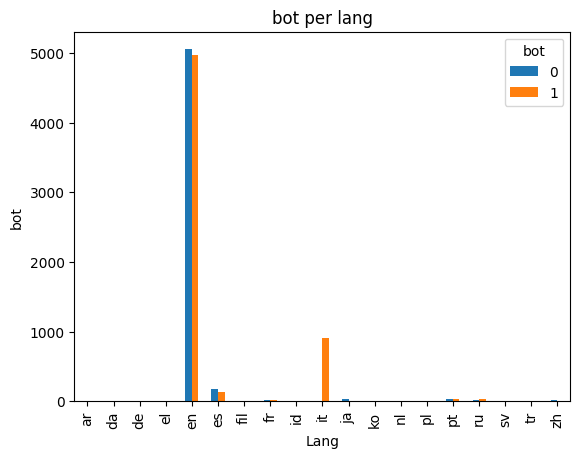

In [6]:
plot_lang_hist(data)

The following function discretizes the data using a function contained in _classification_utils.py_; the new added column is called _lang\_num_.

In [7]:
data = discretize_data(data, ["lang"])

In [8]:
data.head()

,name,lang,bot,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std,lang_num
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76,62.340909,14.015152,0.000000,0.272727,0.098485,0.0,0.0,0.037879,0.190903,0.232481,0.037879,0.190903,4
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54,69.082645,15.041322,0.000000,0.338843,0.024793,0.0,0.0,0.049587,0.217090,0.284639,0.024793,0.155495,4
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,53,65.340909,14.694444,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50,86.944871,18.689463,0.022331,0.006281,0.072575,0.0,0.0,0.165387,0.530838,0.669155,0.826239,13.034008,9
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085,72.311246,14.582073,0.000825,0.506461,0.118229,0.0,0.0,0.056365,0.243387,0.317182,0.016772,0.142619,4


We create the training and test set using a function available in classification_utils.py.

In [9]:
train_set, test_set, train_label, test_label = prepare_data(data)

Classification features : ['created_at', 'statuses_count', 'avg_length', 'avg_special_chars', 'urls_ratio', 'mentions_ratio', 'hashtags_ratio', 'reply_count_mean', 'reply_count_std', 'favorite_count_mean', 'favorite_count_std', 'favorite_count_entropy', 'retweet_count_mean', 'retweet_count_std', 'lang_num']


In [10]:
train_set.head()

,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std,lang_num
2351467735,1550743978,53,46.951807,9.884337,0.000000,0.387952,0.038554,0.0,0.0,0.043373,0.203696,0.257551,0.089157,1.095116,4
347587058,1470273787,53,78.573190,17.079357,0.005109,0.000000,0.000000,0.0,0.0,0.013137,0.127206,0.098533,0.013137,0.122918,4
1129895606,1517367911,53,55.833333,12.611111,0.000000,0.000000,0.111111,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,4
269193431,1458547948,9105,60.301689,12.949343,0.051782,0.505816,0.036398,0.0,0.0,0.160600,0.495103,0.661001,7.414634,40.107973,4
2368471386,1551683554,54,63.949580,15.117647,0.000000,0.352941,0.084034,0.0,0.0,0.050420,0.254332,0.281797,0.016807,0.128547,4


In [11]:
train_label.head()

2351467735    1
347587058     1
1129895606    1
269193431     0
2368471386    1
Name: bot, dtype: int64

### Usage of Lang
We are going to train the model using also the **Lang** feature.

We apply the standard scaler transformation.

In [12]:
# To use GaussianNB we have to have gaussian distributed data, so apply standard scaler

scaler = StandardScaler()

train_X = scaler.fit_transform(train_set.values)
test_X = scaler.transform(test_set.values)

We create the model and we fit the training set.

In [13]:
#import, define and fit the model
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_X, train_label)

#predict on the test set
train_pred_gnb = gnb.predict(train_X)
test_pred_gnb = gnb.predict(test_X)

#### Printing metrics

In [14]:
print_metrics(train_label, train_pred_gnb, test_label, test_pred_gnb)

Accuracy train set  0.8440720049658598
Accuracy test set  0.8343469446857805
Precision train set  0.8585563070731236
Recall train set  0.8440720049658598
F1 score train set  0.8411966733963406
Support train set  (array([0.93116438, 0.79454722]), array([0.72045575, 0.95304835]), array([0.81236929, 0.86661003]), array([3774, 4281]))


In [15]:
#compute the performance of the model
report_scores(test_label,test_pred_gnb)

              precision    recall  f1-score   support

        <=50       0.93      0.70      0.80      1618
         >50       0.78      0.95      0.86      1835

    accuracy                           0.83      3453
   macro avg       0.85      0.83      0.83      3453
weighted avg       0.85      0.83      0.83      3453



In [16]:
# cross validation
scores = cross_validate(gnb, train_X, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.0024892489115397134
Score time  0.0012690226236979167
Test score  0.8433271260086902
Train score  0.844009931719429


#### Confusion Matrix

/Users/lucamoroni/Desktop/__WorkSpace/__Universita/unipi/DataMining/Data_Mining_22_23/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


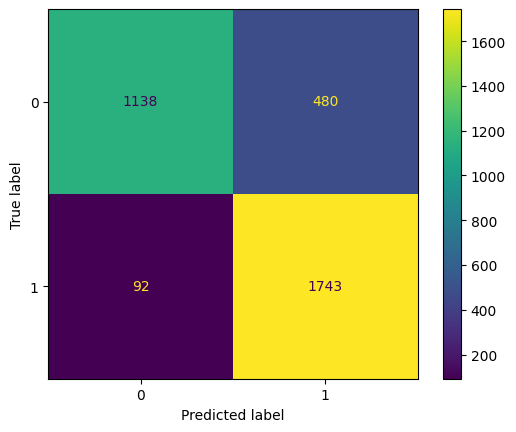

In [17]:
#it is possible to plot the confusion matrix 
#compute confusion matrix
cm = confusion_matrix(test_label, test_pred_gnb)
plot_confusion_matrix(gnb, test_X, test_label)
plt.show() 

#### ROC curve

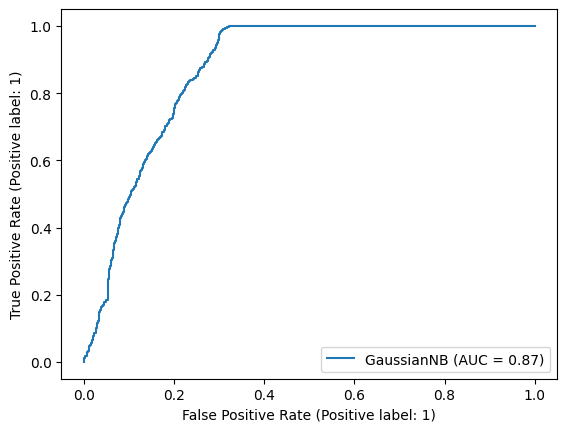

In [18]:
svc_disp = RocCurveDisplay.from_estimator(gnb, test_X, test_label)
plt.show()

#### PCA Blobs

In [19]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_X)

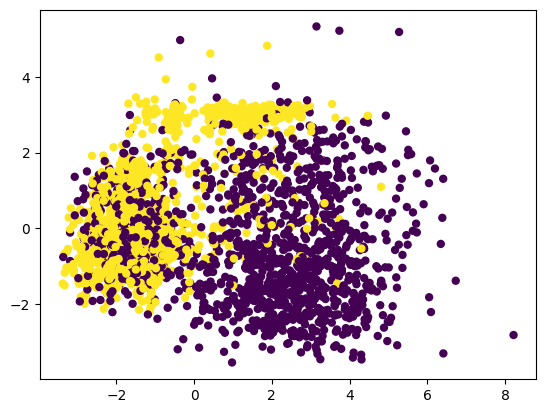

In [20]:
#true labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label.values, s=25);

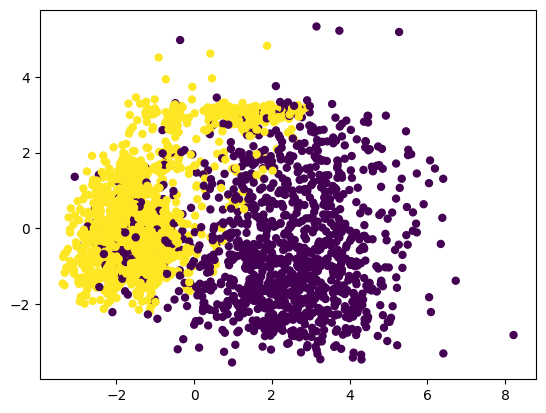

In [21]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred_gnb, s=25);

#### Saving the model

In [22]:
with open("models_checkpoints/bn_lang.bin", "wb") as f:
    pickle.dump(gnb, f)

### How lang is biased

In [23]:
# take a non bot user
non_bot_users = test_set[test_label==0]
total_bot = (test_label==0).sum()

In [24]:
test_set.head()

,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std,lang_num
433346840,1481461640,53,76.367196,14.694444,0.005109,0.115344,0.092063,0.0,0.0,0.001058,0.032513,0.011985,0.502646,1.670232,15
3018833249,1581027304,3737,51.149189,10.895135,0.123243,0.614054,0.127568,0.0,0.0,0.092973,0.431220,0.427675,10.128649,48.632829,4
2352015044,1550770156,76,67.586207,14.765517,0.000000,0.289655,0.048276,0.0,0.0,0.055172,0.256752,0.307591,0.041379,0.199166,4
2192767087,1542308139,3395,55.013184,12.011866,0.030653,0.674687,0.141727,0.0,0.0,0.397825,0.230747,0.736310,0.043478,68.490421,4
31393396,1397737054,23508,62.396532,13.679769,0.079383,0.751445,0.168015,0.0,0.0,0.130250,0.408001,0.579183,12.171484,51.358803,4


In [25]:
non_bot_users_X = scaler.transform(non_bot_users.values)

In [26]:
gnb.predict(non_bot_users_X).sum()/total_bot

0.29666254635352285

In [27]:
for lang in data.lang_num.unique():
    # substitute lang_num with 9 (italian), all the italian are bots
    modified_non_bot_users = non_bot_users.copy()
    modified_non_bot_users["lang_num"] = lang
    modified_non_bot_users.head()
    modified_non_bot_users_X = scaler.transform(modified_non_bot_users.values)
    print(f"number bot classified with lang_num = {lang} : {gnb.predict(modified_non_bot_users_X).sum()/total_bot}")

number bot classified with lang_num = 4 : 0.29480840543881337
number bot classified with lang_num = 9 : 0.2985166872682324
number bot classified with lang_num = 7 : 0.29604449938195304
number bot classified with lang_num = 15 : 0.30407911001236093
number bot classified with lang_num = 5 : 0.29480840543881337
number bot classified with lang_num = 17 : 0.30778739184178
number bot classified with lang_num = 14 : 0.3022249690976514
number bot classified with lang_num = 12 : 0.3003708281829419
number bot classified with lang_num = 8 : 0.29666254635352285
number bot classified with lang_num = 18 : 0.3096415327564895
number bot classified with lang_num = 10 : 0.29913473423980225
number bot classified with lang_num = 2 : 0.29480840543881337
number bot classified with lang_num = 11 : 0.3003708281829419
number bot classified with lang_num = 1 : 0.2954264524103832
number bot classified with lang_num = 0 : 0.29604449938195304
number bot classified with lang_num = 13 : 0.3009888751545117
number bot

### No Usage of language

We delete the language feature on both training and test set.

In [28]:
del train_set["lang_num"]

In [29]:
train_set.head()

,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
2351467735,1550743978,53,46.951807,9.884337,0.000000,0.387952,0.038554,0.0,0.0,0.043373,0.203696,0.257551,0.089157,1.095116
347587058,1470273787,53,78.573190,17.079357,0.005109,0.000000,0.000000,0.0,0.0,0.013137,0.127206,0.098533,0.013137,0.122918
1129895606,1517367911,53,55.833333,12.611111,0.000000,0.000000,0.111111,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
269193431,1458547948,9105,60.301689,12.949343,0.051782,0.505816,0.036398,0.0,0.0,0.160600,0.495103,0.661001,7.414634,40.107973
2368471386,1551683554,54,63.949580,15.117647,0.000000,0.352941,0.084034,0.0,0.0,0.050420,0.254332,0.281797,0.016807,0.128547


In [30]:
del test_set["lang_num"]

In [31]:
test_set.head()

,created_at,statuses_count,avg_length,avg_special_chars,urls_ratio,mentions_ratio,hashtags_ratio,reply_count_mean,reply_count_std,favorite_count_mean,favorite_count_std,favorite_count_entropy,retweet_count_mean,retweet_count_std
433346840,1481461640,53,76.367196,14.694444,0.005109,0.115344,0.092063,0.0,0.0,0.001058,0.032513,0.011985,0.502646,1.670232
3018833249,1581027304,3737,51.149189,10.895135,0.123243,0.614054,0.127568,0.0,0.0,0.092973,0.431220,0.427675,10.128649,48.632829
2352015044,1550770156,76,67.586207,14.765517,0.000000,0.289655,0.048276,0.0,0.0,0.055172,0.256752,0.307591,0.041379,0.199166
2192767087,1542308139,3395,55.013184,12.011866,0.030653,0.674687,0.141727,0.0,0.0,0.397825,0.230747,0.736310,0.043478,68.490421
31393396,1397737054,23508,62.396532,13.679769,0.079383,0.751445,0.168015,0.0,0.0,0.130250,0.408001,0.579183,12.171484,51.358803


We scale the data using the standard scaler transformation.

In [32]:
scaler = StandardScaler()

train_X = scaler.fit_transform(train_set.values)
test_X = scaler.transform(test_set.values)

In [33]:
#import, define and fit the model
from sklearn.naive_bayes import GaussianNB

gnb2 = GaussianNB()
gnb2.fit(train_X, train_label)

#predict on the test set
train_pred_gnb = gnb2.predict(train_X)
test_pred_gnb = gnb2.predict(test_X)

#### Printing metrics

In [34]:
print_metrics(train_label, train_pred_gnb, test_label, test_pred_gnb)

Accuracy train set  0.8382371198013656
Accuracy test set  0.8256588473790907
Precision train set  0.8499440696042119
Recall train set  0.8382371198013656
F1 score train set  0.8356308955363226
Support train set  (array([0.91362571, 0.79380426]), array([0.72310546, 0.93973371]), array([0.80727703, 0.86062681]), array([3774, 4281]))


In [35]:
#compute the performance of the model
report_scores(test_label,test_pred_gnb)

              precision    recall  f1-score   support

        <=50       0.90      0.71      0.79      1618
         >50       0.78      0.93      0.85      1835

    accuracy                           0.83      3453
   macro avg       0.84      0.82      0.82      3453
weighted avg       0.84      0.83      0.82      3453



In [36]:
# cross validation
scores = cross_validate(gnb2, train_X, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

Fit time  0.002705176671346029
Score time  0.0010464191436767578
Test score  0.838112973308504
Train score  0.8382991930477964


#### Confusion Matrix

/Users/lucamoroni/Desktop/__WorkSpace/__Universita/unipi/DataMining/Data_Mining_22_23/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


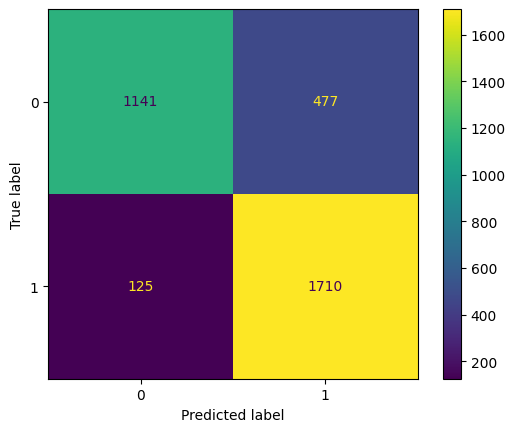

In [37]:
#it is possible to plot the confusion matrix 
#compute confusion matrix
cm = confusion_matrix(test_label, test_pred_gnb)
plot_confusion_matrix(gnb2, test_X, test_label)
plt.show() 

#### ROC Curve

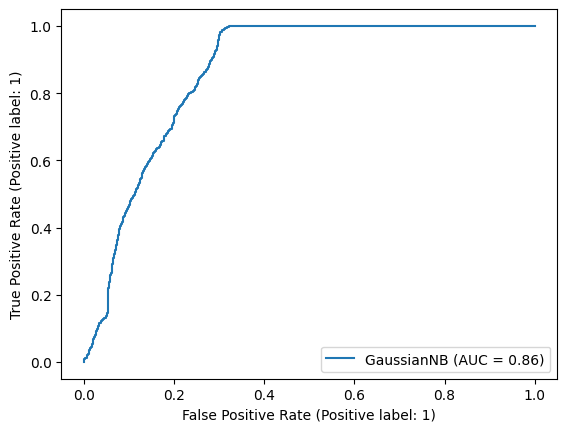

In [38]:
svc_disp = RocCurveDisplay.from_estimator(gnb2, test_X, test_label)
plt.show()

#### PCA Blobs

In [39]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_X)

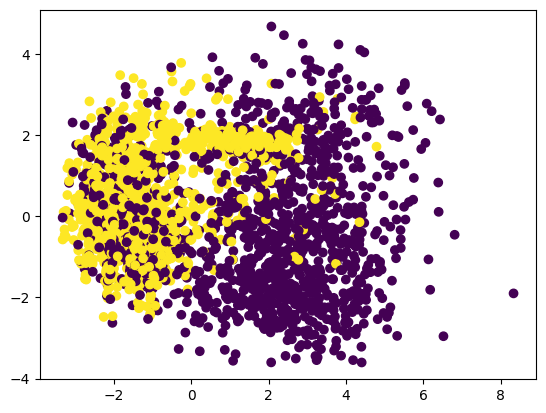

In [40]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label.values);

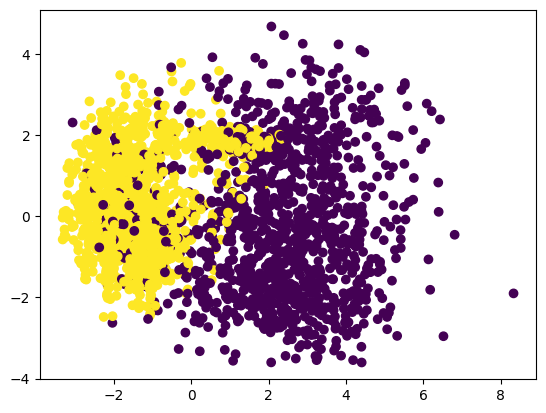

In [41]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred_gnb);

#### Saving the model

In [42]:
with open("models_checkpoints/bn_no_lang.bin", "wb") as f:
    pickle.dump(gnb, f)